# Машинное обучение, ФКН ВШЭ

# Практическое задание 9. EM-алгоритм

## Общая информация

Дата выдачи: 28.02.2024

Мягкий дедлайн: 19.03.2024 23:59 MSK

Жёсткий дедлайн: 25.03.2024 23:59 MSK

## Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимальная оценка за работу (без учёта бонусов) — 15 баллов.

Сдавать задание после указанного жёсткого срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-09-em-Username.ipynb
* Модули preprocessing.py, metrics.py, models.py, содержащие написанный вами код
* Ссылки на посылки в Яндекс.Контест для всех функций и классов, которые вы реализовали

Ссылка на Яндекс.Контест: https://contest.yandex.ru/contest/60281

Username — ваша фамилия и имя на латинице именно в таком порядке

# Generative model of Labels, Abilities, and Difficulties (GLAD)

В [семинаре 16](https://github.com/esokolov/ml-course-hse/blob/master/2022-spring/seminars/sem16-em.pdf) мы рассмотрели задачу восстановления истинной разметки по меткам от экспертов (которым мы не можем доверять в полной мере, более того, их предсказания могут расходиться).

Рассмотрим следующую вероятностную модель:

$$ p(L, Z | \alpha, \beta) = \prod_{i=1}^{n} \prod_{j=1}^m \sigma(\alpha_j\beta_i)^{[l_{ij}=z_i]}\sigma(-\alpha_j\beta_i)^{1-[l_{ij}=z_i]} p(z_j)$$

где $l_{ij} -$ ответ $j$-го эксперта на задачу $i$, $z_j -$ истинная разметка, $\alpha_i, \beta_j-$ уровень экспертизы и сложность задачи соответственно. Для более подробного описания модели можно прочитать материалы семинара, а также [оригинальную статью](http://papers.nips.cc/paper/3644-whose-vote-should-count-more-optimal-integration-of-labels-from-labelers-of-unknown-expertise.pdf). Априорное распределение положим равномерным: $p(z_i) = 0.5$.

In [1]:
import numpy as np
from scipy.special import expit, logsumexp

seed = 0xDEADF00D
np.random.seed(seed)

In [2]:
L = np.load('L.npy')
n, m = L.shape

**Задание 1. (2 балла)** Реализуйте EM-алгоритм для заданной выше модели. Вы можете воспользоваться предложенными шаблонами или написать свои.

Обратите внимание, что правдоподобие моделирует не вероятность метки $l_{ij}$ принять значение 1 или 0, а вероятность того, что она равна скрытой переменной $z_i$, т.е. $p(l_{ij} = z_j|z_j, \alpha_j, \beta_i) \neq p(l_{ij} = 1|\alpha_j, \beta_i) $. При этом заранее неизвестно, какая из скрытых переменных соответствует метке 1. Не забывайте, что параметры $\beta_i$ должны быть неотрицательными; для этого оптимизируйте $\log \beta$. На M-шаге можете использовать как один шаг градиентного спуска, так и несколько: разумные результаты у вас должны получаться вне зависимости от числа итераций.

Также при работе с вероятностями не забывайте о точности:
1. Используйте логарифмы вероятностей.
2. $\log \sigma(a)$ лучше преобразовать в $\log \sigma(a) = -\log(1 + \exp(-a)) = -\mathrm{softplus}(-a) $
3. Ещё полезные функции: `scipy.special.expit`, `scipy.special.logsumexp`, `np.log1p`

Для отладки может быть полезно проверить градиент с помощью `scipy.optimize.check_grad`.

In [3]:
def softplus(x):
    '''stable version of log(1 + exp(x))'''
    c = (x > 20) * 1.
    return np.log1p(np.exp(x * (1-c)) * (1-c)) + x * c

In [5]:
posterior(np.random.randn(m), np.random.randn(n), L)[:1000]

NameError: name 'posterior' is not defined

In [ ]:
alpha = np.random.randn(m)
beta = np.random.randn(n)

alpha.shape

sgm = np.array([alpha]).T@np.array([beta])

sgm.shape

sgm

expit(sgm)

L.T[0]

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
expit(np.array([alpha]).T@np.array([beta]))

array([[0.50437815, 0.74864988, 0.81931175, ..., 0.69267456, 0.75924673,
        0.524418  ],
       [0.48553934, 0.02644737, 0.00673117, ..., 0.06387605, 0.02199849,
        0.41995919],
       [0.49715294, 0.32965832, 0.27229262, ..., 0.37087814, 0.32150129,
        0.48411418],
       ...,
       [0.49687388, 0.31447127, 0.25362409, ..., 0.35887517, 0.3057447 ,
        0.48255828],
       [0.48884551, 0.05835514, 0.02079617, ..., 0.1119737 , 0.05085159,
        0.43805041],
       [0.48987386, 0.07415053, 0.02940486, ..., 0.13241441, 0.06557339,
        0.44371245]])

In [ ]:
q = log_likelihood(np.random.randn(m), np.random.randn(n), L, L.T[0])

(np.array([q[0]]).T@np.array([alpha])).shape



(2000, 20)

In [ ]:
logbeta_grad_lb(alpha, beta, L, q)

array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:
np.sum(np.array([q[0] * beta]).T@np.array([alpha]) * ((L == L_0) * sigm_eq.T + (L==L_1) * sigm_neq.T) + np.array([q[1] * beta]).T@np.array([alpha]) * ((L == L_1) * sigm_eq.T + (L==L_0) * sigm_neq.T), axis=1)

array([-3.06548816, -0.41440524,  0.13476707, ..., -0.48737578,
        1.05710659, -0.586156  ])

In [ ]:
np.array([q[0] * beta]).T@np.array([alpha])

array([[ 0.51378951, -0.13141697,  0.10472515, ..., -0.21838614,
        -0.87453093,  0.12694275],
       [-0.21540273,  0.05509566, -0.0439053 , ...,  0.09155689,
         0.3666411 , -0.05321988],
       [-0.12771007,  0.03266565, -0.026031  , ...,  0.05428315,
         0.21737776, -0.03155352],
       ...,
       [ 0.77372854, -0.19790411,  0.15770823, ..., -0.32887318,
        -1.31697811,  0.19116627],
       [-0.17846918,  0.04564881, -0.03637718, ...,  0.07585829,
         0.3037758 , -0.04409465],
       [ 0.44763416, -0.11449577,  0.09124078, ..., -0.19026682,
        -0.76192665,  0.11059765]])

In [ ]:
sigm_eq = expit(np.array([alpha]).T@np.array([beta]))
sigm_neq = expit(-np.array([alpha]).T@np.array([beta]))
L_0 = np.array([np.round(q[0]) for i in range(len(alpha))]).T
L_1 = np.array([np.round(q[1]) for i in range(len(alpha))]).T

((L == L_0) * sigm_eq.T + (L==L_1) * sigm_neq.T)

array([[0.77880811, 0.54986354, 0.1954183 , ..., 0.3609688 , 0.8815407 ,
        0.70303669],
       [0.54575979, 0.492705  , 0.55140924, ..., 0.52081015, 0.42734734,
        0.46862363],
       [0.48600206, 0.49777398, 0.51573664, ..., 0.50635301, 0.47768871,
        0.49041489],
       ...,
       [0.44844761, 0.50822452, 0.55790547, ..., 0.52345854, 0.418245  ,
        0.46463758],
       [0.61846132, 0.51918886, 0.63252315, ..., 0.55457563, 0.31643616,
        0.41806923],
       [0.43988413, 0.50960277, 0.56750147, ..., 0.52738327, 0.40485108,
        0.45873529]])

In [ ]:
sigm_eq = expit(np.array([alpha]).T@np.array([beta]))
sigm_neq = expit(-np.array([alpha]).T@np.array([beta]))

z = L.T[0]
z_lsize = np.array([z for i in range(len(alpha))]).T
zn = 1 - z
zn_lsize = np.array([zn for i in range(len(alpha))]).T

print(z)
print(zn)

gamma_z = np.log(0.5) + np.sum((L == z_lsize) * np.log(sigm_eq).T + (L==z_lsize) * np.log(sigm_neq).T, axis=1)
print(sigm_eq)
print(np.log(sigm_eq))
gamma_nz = np.log(0.5) + np.sum((L == zn_lsize) * np.log(sigm_eq).T + (L==zn_lsize) * np.log(sigm_neq).T, axis=1)
np.array([np.exp(gamma_z)/(np.exp(gamma_z) + np.exp(gamma_nz)), 1 - np.exp(gamma_z)/(np.exp(gamma_z) + np.exp(gamma_nz))])

[1 0 1 ... 1 1 0]
[0 1 0 ... 0 0 1]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
alpha = np.random.randn(m)
beta = np.random.randn(n)

posterior(alpha, beta, L)[:1000]

sigm_eq = expit(np.array([alpha]).T@np.array([beta]))


(L == z_lsize) * np.log(sigm_eq).T

array([[-0.39037298, -0.44224707, -0.70727344, ..., -0.20020094,
        -0.        , -0.80723566],
       [-0.86268351, -0.        , -0.        , ..., -0.        ,
        -0.80975452, -0.        ],
       [-0.74275429, -0.73232737, -0.69131039, ..., -0.79674444,
        -0.        , -0.6790617 ],
       ...,
       [-0.28738295, -0.        , -0.71423833, ..., -0.1009818 ,
        -0.        , -0.86712459],
       [-1.28337707, -1.14439073, -0.        , ..., -0.        ,
        -1.08588585, -0.        ],
       [-0.69587711, -0.        , -0.6930437 , ..., -0.69871986,
        -0.        , -0.69234901]])

In [ ]:
alpha = np.random.randn(m)
beta = np.random.randn(n)

sigm_eq = expit(np.array([alpha]).T@np.array([beta]))
sigm_neq = expit(-np.array([alpha]).T@np.array([beta]))

z_lsize = np.array([z for i in range(len(alpha))]).T
zn = 1 - z
zn_lsize = np.array([zn for i in range(len(alpha))]).T

gamma_z = np.log(0.5) + np.sum((L == z_lsize) * np.log(sigm_eq).T + (L!=z_lsize) * np.log(sigm_neq).T, axis=1)
gamma_nz = np.log(0.5) + np.sum((L == zn_lsize) * np.log(sigm_eq).T + (L!=zn_lsize) * np.log(sigm_neq).T, axis=1)


print(np.exp(gamma_z))

print(np.exp(gamma_nz))

np.exp(gamma_z) / (np.exp(gamma_z) + np.exp(gamma_nz))

[1.50804533e-07 5.07604190e-07 4.78285020e-07 ... 6.36449143e-08
 2.75338555e-07 4.15740606e-07]
[1.99253653e-07 4.16373023e-07 4.54243912e-07 ... 1.28698217e-09
 3.63813860e-07 5.18571469e-07]


array([0.43079848, 0.54936873, 0.51289027, ..., 0.98017951, 0.43078701,
       0.44496975])

In [4]:
def posterior(alpha, beta, L):
    """ Posterior over true labels z p(z|l, \alpha, \beta)
    Args:
        alpha: ndarray of shape (n_experts).
        beta: ndarray of shape (n_problems).
        L: ndarray of shape (n_problems, n_experts).
    """
    sigm_eq = expit(np.array([alpha]).T@np.array([beta]))
    sigm_neq = expit(-np.array([alpha]).T@np.array([beta]))

    z = np.ones(len(beta))

    z_lsize = np.array([z for i in range(len(alpha))]).T
    zn = 1 - z
    zn_lsize = np.array([zn for i in range(len(alpha))]).T

    gamma_z = np.log(0.5) + np.sum((L == z_lsize) * (-softplus(-np.array([alpha]).T@np.array([beta]))).T + (L!=z_lsize) * (-softplus(np.array([alpha]).T@np.array([beta]))).T, axis=1)
    gamma_nz = np.log(0.5) + np.sum((L == zn_lsize) * (-softplus(-np.array([alpha]).T@np.array([beta]))).T + (L!=zn_lsize) * (-softplus(np.array([alpha]).T@np.array([beta]))).T, axis=1)
    return np.array([np.exp(gamma_z)/(np.exp(gamma_z) + np.exp(gamma_nz)), 1 - np.exp(gamma_z)/(np.exp(gamma_z) + np.exp(gamma_nz))])






def log_likelihood(alpha, beta, L, z):
    """ p(l=z|z, \alpha, \beta)
    Args:
        alpha: ndarray of shape (n_experts).
        beta: ndarray of shape (n_problems).
        L: ndarray of shape (n_problems, n_experts).
        z: ndarray of shape (n_problems).
    """
    sigm_eq = expit(np.array([alpha]).T@np.array([beta]))
    sigm_neq = expit(-np.array([alpha]).T@np.array([beta]))

    z_lsize = np.array([z for i in range(len(alpha))]).T
    zn = 1 - z
    zn_lsize = np.array([zn for i in range(len(alpha))]).T

    gamma_z = np.log(0.5) + np.sum((L == z_lsize) * (-softplus(-np.array([alpha]).T@np.array([beta]))).T + (L!=z_lsize) * (-softplus(np.array([alpha]).T@np.array([beta]))).T, axis=1)
    gamma_nz = np.log(0.5) + np.sum((L == zn_lsize) * (-softplus(-np.array([alpha]).T@np.array([beta]))).T + (L!=zn_lsize) * (-softplus(np.array([alpha]).T@np.array([beta]))).T, axis=1)
    return np.array([np.exp(gamma_z)/(np.exp(gamma_z) + np.exp(gamma_nz)), 1 - np.exp(gamma_z)/(np.exp(gamma_z) + np.exp(gamma_nz))])


def alpha_grad_lb(alpha, beta, L, q):
    """ Gradient of lower bound wrt alpha
    Args:
        alpha: ndarray of shape (n_experts).
        beta: ndarray of shape (n_problems).
        L: ndarray of shape (n_problems, n_experts).
        q: ndarray of shape (2, n_problems).
    """
    sigm_eq = expit(np.array([alpha]).T@np.array([beta]))
    sigm_neq = expit(-np.array([alpha]).T@np.array([beta]))
    L_0 = np.array([np.round(q[0]) for i in range(len(alpha))]).T
    L_1 = np.array([np.round(q[1]) for i in range(len(alpha))]).T
    coef_0 = np.array([q[0] * beta for i in range(len(alpha))]).T
    coef_1 = np.array([q[1] * beta for i in range(len(alpha))]).T

    return np.sum(coef_0 * ((L == 1) * sigm_neq.T - (L==0) * sigm_eq.T) + coef_1 * ((L == 0) * sigm_neq.T - (L==1) * sigm_eq.T), axis=0)


def logbeta_grad_lb(alpha, beta, L, q):
    """ Gradient of lower bound wrt alpha
    Args:
        alpha: ndarray of shape (n_experts).
        beta: ndarray of shape (n_problems).
        L: ndarray of shape (n_problems, n_experts).
        q: ndarray of shape (2, n_problems).
    """
    sigm_eq = expit(np.array([alpha]).T@np.array([beta]))
    sigm_neq = expit(-np.array([alpha]).T@np.array([beta]))
    L_0 = np.array([np.round(q[0]) for i in range(len(alpha))]).T
    L_1 = np.array([np.round(q[1]) for i in range(len(alpha))]).T
    coef_0 = np.array([q[0] * beta]).T@np.array([alpha])
    coef_1 = np.array([q[1] * beta]).T@np.array([alpha])

    return np.sum(coef_0 * ((L == 1) * sigm_neq.T - (L==0) * sigm_eq.T) + coef_1 * ((L == 0) * sigm_neq.T - (L==1) * sigm_eq.T), axis=1)


def lower_bound(alpha, beta, L, q):
    """ Lower bound
    Args:
        alpha: ndarray of shape (n_experts).
        beta: ndarray of shape (n_problems).
        L: ndarray of shape (n_problems, n_experts).
        q: ndarray of shape (2, n_problems).
    """
    pass

In [5]:
def em(L, n_steps=4000, lr=1e-3):
    # initialize parameters
    n, m = L.shape
    alpha, logbeta = np.random.randn(m), np.random.randn(n)
    q = np.ones((2, len(logbeta))) * 0.5


    for step in range(n_steps):
        q = posterior(alpha, np.exp(logbeta), L)
        print(q[0])
        print('--------------------')
        grad_a = alpha_grad_lb(alpha, np.exp(logbeta), L, q)
        print(grad_a)
        print('--------------------')
        grad_b = logbeta_grad_lb(alpha, np.exp(logbeta), L, q)
        alpha = alpha + lr * grad_a
        logbeta = logbeta + lr * grad_b
        print(alpha)
        print('--------------------')
        print(logbeta)
        print('--------------------')


    return alpha, np.exp(logbeta), q

In [6]:
alpha, beta, q = em(L)

[4.50027193e-06 1.23285268e-02 7.73549095e-02 ... 6.06991116e-01
 9.99898249e-01 9.05450636e-01]
--------------------
[-2.01135568e+03 -1.26595376e+03 -9.21667817e+02 -1.74693624e+02
  7.53707003e+02 -1.33896814e+02 -2.09031672e+03 -3.10211097e+02
 -6.34261138e+01  6.38272048e+02  3.42615241e-02  2.56996987e+03
  3.58744614e+01 -1.63264572e+03  6.23532026e+02  2.43578391e+02
  1.30757074e+02 -2.61281029e+03  6.14515804e+02  2.13357092e+02]
--------------------
[-0.9993397  -1.01965018 -1.01571369 -0.28956874 -1.12205793 -0.95749509
 -0.5009989  -0.79950113  1.67460902 -0.45782199  1.53006604  1.80309702
 -1.46842427 -1.09095329 -0.41184386 -0.06635693 -0.25430198 -1.66362415
  0.8990115  -1.67154247]
--------------------
[ 0.48764056 -0.50216438  0.15248696 ... -1.61090879  0.65000428
 -0.99817623]
--------------------
[2.99626341e-12 4.99509936e-05 4.31924933e-09 ... 2.01385699e-01
 1.00000000e+00 9.97417683e-01]
--------------------
[ 485.83257132  615.44288327  -95.80452851  139.591

In [8]:
L[0].reshape(1, 20)

array([[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1]],
      dtype=int64)

In [9]:
L.shape

(2000, 20)

In [10]:
alpha

array([-0.48569808, -0.60955022, -5.80345392, -0.40587791, -0.47684248,
       -5.60310382, -0.48397107, -4.94985344,  5.45087169, -0.50491989,
        5.86039072,  5.53500126, -5.38568234, -0.41102829, -0.50390827,
       -0.39193331, -0.50266211, -5.28762639,  5.11530327, -5.16621731])

In [11]:
L

array([[1, 1, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 1],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0]], dtype=int64)

In [38]:
q[:10]

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        9.99299423e-01, 1.91731002e-24, 3.18034566e-38],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.00577419e-04, 1.00000000e+00, 1.00000000e+00]])

In [11]:
z = posterior(alpha, beta, L)
q = log_likelihood(alpha, beta, L, z)
print(q[0][:10])
print('--------------------')


sigm_eq = expit(np.array([alpha]).T@np.array([beta]))
print(sigm_eq)
print('--------------------')
sigm_neq = expit(-np.array([alpha]).T@np.array([beta]))
print(sigm_neq)
print('--------------------')
L_0 = np.array([np.round(q[0]) for i in range(len(alpha))]).T
print(L_0)
print('--------------------')
L_1 = np.array([np.round(q[1]) for i in range(len(alpha))]).T
print(L_1)
print('--------------------')
coef_0 = np.array([q[0] * beta for i in range(len(alpha))]).T
print(coef_0)
print('--------------------')
coef_1 = np.array([q[1] * beta for i in range(len(alpha))]).T
print(coef_1)
print('--------------------')

np.sum(coef_0 * ((L == L_0) * sigm_eq.T - (L==L_1) * sigm_neq.T))# + coef_1 * ((L == L_1) * sigm_eq.T - (L==L_0) * sigm_neq.T), axis=0)

[0.77646875 0.99985187 1.         1.         0.67643841 1.
 0.98859052 0.88953341 0.99999956 0.06842559]
--------------------
[[1.04224918e-01 1.89853775e-06 8.30773402e-05 ... 1.59494452e-02
  7.57112807e-02 1.25819980e-03]
 [9.10867650e-01 9.99999342e-01 9.99960999e-01 ... 9.88502234e-01
  9.37231789e-01 9.99264487e-01]
 [6.80048016e-01 9.90221568e-01 9.64196806e-01 ... 8.09210033e-01
  7.06201552e-01 9.12158606e-01]
 ...
 [2.36533218e-01 7.63791023e-04 5.95199963e-03 ... 9.57384457e-02
  2.03760039e-01 2.56548077e-02]
 [7.13018560e-01 9.96218147e-01 9.81567846e-01 ... 8.51196557e-01
  7.42417463e-01 9.44000522e-01]
 [8.30623852e-01 9.99941013e-01 9.99037467e-01 ... 9.54654679e-01
  8.64065253e-01 9.92862968e-01]]
--------------------
[[8.95775082e-01 9.99998101e-01 9.99916923e-01 ... 9.84050555e-01
  9.24288719e-01 9.98741800e-01]
 [8.91323497e-02 6.57523053e-07 3.90012824e-05 ... 1.14977662e-02
  6.27682110e-02 7.35513124e-04]
 [3.19951984e-01 9.77843249e-03 3.58031939e-02 ... 1.90

<ipython-input-6-9fae31b89973>:33: RuntimeWarning: invalid value encountered in divide
  return np.array([np.exp(gamma_z)/(np.exp(gamma_z) + np.exp(gamma_nz)), 1 - np.exp(gamma_z)/(np.exp(gamma_z) + np.exp(gamma_nz))])


nan

In [12]:
np.any(np.isnan(q[0]))

True

In [13]:
np.any(np.isnan(z))

False

In [14]:
alpha, beta

sigm_eq = expit(np.array([alpha]).T@np.array([beta]))
sigm_neq = expit(-np.array([alpha]).T@np.array([beta]))

z_lsize = np.array([z for i in range(len(alpha))]).T
zn = 1 - z
zn_lsize = np.array([zn for i in range(len(alpha))]).T

gamma_z = np.log(0.5) + np.sum((L == z_lsize) * np.log(sigm_eq).T + (L!=z_lsize) * np.log(sigm_neq).T, axis=1)
gamma_nz = np.log(0.5) + np.sum((L == zn_lsize) * np.log(sigm_eq).T + (L!=zn_lsize) * np.log(sigm_neq).T, axis=1)
np.array([np.exp(gamma_z)/(np.exp(gamma_z) + np.exp(gamma_nz)), 1 - np.exp(gamma_z)/(np.exp(gamma_z) + np.exp(gamma_nz))])

<ipython-input-14-1af4482d774c>:12: RuntimeWarning: invalid value encountered in divide
  np.array([np.exp(gamma_z)/(np.exp(gamma_z) + np.exp(gamma_nz)), 1 - np.exp(gamma_z)/(np.exp(gamma_z) + np.exp(gamma_nz))])


array([[7.76468745e-01, 9.99851872e-01, 1.00000000e+00, ...,
        9.99999995e-01, 9.99999087e-01, 1.00000000e+00],
       [2.23531255e-01, 1.48127744e-04, 2.59792188e-14, ...,
        4.90255636e-09, 9.12805604e-07, 1.29696254e-12]])

In [15]:
np.any(np.isnan(sigm_eq))

False

In [16]:
np.any(np.isnan(sigm_neq))

False

In [17]:
np.any(np.isnan(gamma_z))

False

In [18]:
np.any(np.isnan(gamma_nz))

False

In [19]:
np.any(np.isnan(np.array([np.exp(gamma_z)/(np.exp(gamma_z) + np.exp(gamma_nz)), 1 - np.exp(gamma_z)/(np.exp(gamma_z) + np.exp(gamma_nz))])))

<ipython-input-19-896c68e52603>:1: RuntimeWarning: invalid value encountered in divide
  np.any(np.isnan(np.array([np.exp(gamma_z)/(np.exp(gamma_z) + np.exp(gamma_nz)), 1 - np.exp(gamma_z)/(np.exp(gamma_z) + np.exp(gamma_nz))])))


True

In [33]:
np.exp(gamma_z), np.exp(gamma_nz)

(array([3.21023908e-09, 3.79602354e-39, 7.04787551e-23, ...,
        3.88751227e-10, 3.23035118e-07, 1.24045791e-15]),
 array([9.24169549e-10, 5.62379706e-43, 1.83383256e-36, ...,
        1.90587478e-18, 2.94868535e-13, 1.60880384e-27]))

In [23]:
arr = np.ones((2, len(beta))) * 0.5
arr.shape

(2, 2000)

**Задание 2. (1 балл)** Загрузите настоящую разметку. Посчитайте `accuracy` разметки, полученной с помощью обычного голосования по большинству среди экспертов, и сравните его с качеством, полученным с помощью EM-алгоритма. Помните, что алгоритму не важно, какая метка 0, а какая 1, поэтому если получите качество <0.5, то просто поменяйте метки классов (не забудьте также поменять знак у $\alpha$).

In [7]:
from sklearn.metrics import accuracy_score

y = np.load('y.npy')

yp = np.mean(L, axis=1)
print(f"accuracy_votes = {accuracy_score(y, np.round(yp))}")
print(f"accuracy_glad = {accuracy_score(y, np.round(q[0]))}")
# (∩ ￣ー￣)⊃ ✳✨✳✨✳✨✳

accuracy_votes = 0.904
accuracy_glad = 0.0465


**Задание 3. (0.5 балла)** Попробуйте проинтерпретировать полученные коэфициенты $\alpha$. Есть ли в выборке эксперты, которые намеренно голосуют неверно? Как это можно понять по альфам? Продемонстрируйте, что эксперты действительно чаще голосуют за неверный класс. Постройте график зависимости доли врено размеченных экспертом объектов от коэффициента $\alpha$. Прокомментируйте результаты.

1) Есть ли в выборке эксперты, которые намеренно голосуют неверно?

Как это понять? Такие люди ошибаются больше, чем в 50% случаев. Скорее всего, на простых задачах такие люди будут более вероятно давать неправильный ответ, а на сложных будут скорее давать ответ близкий к случайному.

В первом приближении достаточно посмотреть accuracy каждого из экспертов, давайте так и сделаем:

In [68]:
L.T[0]

array([1, 0, 1, ..., 1, 1, 0])

In [69]:
# (∩ᄑ_ᄑ)⊃━☆ﾟ*･｡*
for i in range(len(alpha)):
    print(f"accuracy of expert {i} equals to {accuracy_score(y, L.T[i])}")

accuracy of expert 0 equals to 0.697
accuracy of expert 1 equals to 0.709
accuracy of expert 2 equals to 0.919
accuracy of expert 3 equals to 0.6745
accuracy of expert 4 equals to 0.6965
accuracy of expert 5 equals to 0.917
accuracy of expert 6 equals to 0.686
accuracy of expert 7 equals to 0.9065
accuracy of expert 8 equals to 0.0905
accuracy of expert 9 equals to 0.704
accuracy of expert 10 equals to 0.0825
accuracy of expert 11 equals to 0.082
accuracy of expert 12 equals to 0.911
accuracy of expert 13 equals to 0.681
accuracy of expert 14 equals to 0.6835
accuracy of expert 15 equals to 0.679
accuracy of expert 16 equals to 0.7015
accuracy of expert 17 equals to 0.909
accuracy of expert 18 equals to 0.088
accuracy of expert 19 equals to 0.9105


Кажется, что эксперты 8, 10, 11 и 18 размечали специально неправильно, так как у них точность разметки на бинарной классификации меньше, чем 10%. Остальные эксперты размечали качественно, так как у них accuracy больше, чем 60%.

Теперь разберемся с альфами:

In [70]:
for i in range(len(alpha)):
    print(f"alpha of {i} expert equals to {alpha[i]}")

alpha of 0 expert equals to 0.4784832495993344
alpha of 1 expert equals to 0.6006280953423359
alpha of 2 expert equals to 5.68561366699046
alpha of 3 expert equals to 0.3997923538431234
alpha of 4 expert equals to 0.46981379819361474
alpha of 5 expert equals to 5.534355154808786
alpha of 6 expert equals to 0.4769269964913848
alpha of 7 expert equals to 4.873276306180525
alpha of 8 expert equals to -5.336430544390787
alpha of 9 expert equals to 0.49724991481247244
alpha of 10 expert equals to -5.761451501888233
alpha of 11 expert equals to -5.455295342245292
alpha of 12 expert equals to 5.297544612832727
alpha of 13 expert equals to 0.4051640316653753
alpha of 14 expert equals to 0.4966939220726606
alpha of 15 expert equals to 0.3860928581811752
alpha of 16 expert equals to 0.4953289851418218
alpha of 17 expert equals to 5.201155387536829
alpha of 18 expert equals to -5.034504821925052
alpha of 19 expert equals to 5.068177013520932


Можно заметить, что эксперты, которые скорее всего размечали намеренно не правильно, имеют сильные отрицательные веса. Таким образом, по знаку альфы мы можем определить, является ли эксперт вредителем. Это полностью согласуется с предположениями, на которых построена модель. Я продемонстрировал, что такие эксперты чаще голосуют за неверный класс.

Теперь построим график зависимости доли размеченных вредным экспертом объектов от коэффициента $\alpha$:

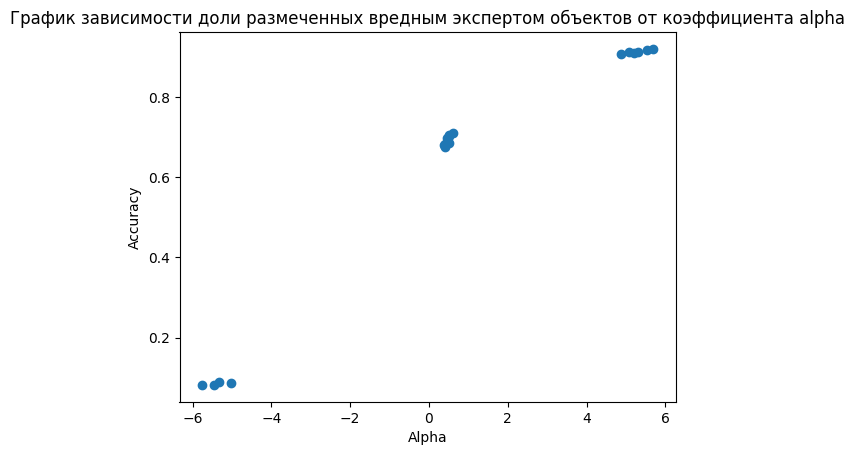

In [76]:
import matplotlib.pyplot as plt

plt.scatter(alpha, [accuracy_score(y, L.T[i]) for i in range(len(alpha))])
plt.title('График зависимости доли размеченных вредным экспертом объектов от коэффициента alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.show()

Заметим, что по accuracy было три кластера, и коэффециент alpha довольно точно воспроизвел это, даже не имея истинной разметки. Таким образом, мы можем сказать, что в данном случае alpha является довольно хорошим прокси accuracy, что говорит о том, что заложенный в параметры смысл действительно был выучен моделью.

**Задание 4. (бонус, 2 балла)**  Как уже было замечено выше, модели не важно, какой класс 1, а какой 0. Скажем, если все эксперты оказались максимально противными и ставят метку с точностью наоборот, то у вас будет полная согласованность между экспертами, при этом невозможно понять правильно они разметили выборку или нет, смотря только на такую разметку. Чтобы избежать этого, можно включать в выборку вопрос с заведомо известным ответом, тогда вы сможете определить, ставит ли эксперт специально неверные метки.

Чтобы обощить данную модель на случай заданий с заведомо известной меткой, достоточно не делать для них E-шаг, а всегда полагать апостериорное распределение вырожденным в истинном классе. Реализуйте данную модель и используйте истинную разметку *для нескольких* задач из обучения. Проинтерпретируйте полученные результаты.

# Выравнивание слов (Word Alignment)

EM-алгоритм также применяют на практике для настройки параметров модели выравнивания слов, более сложные модификации которой используются в статистическом машинном переводе. Мы не будем подробно обсуждать применение word alignment для перевода и ограничимся следующей целью: пусть у нас есть параллельный корпус из предложений на исходном языке и их переводов на целевой язык (в этом задании используются английский и чешский соответственно).

Первая задача — определить с помощью этого корпуса, как переводится каждое отдельное слово на целевом языке. Вторая задача — для произвольной пары из предложения и его перевода установить, переводом какого слова в исходном предложении является каждое слово в целевом предложении. Оказывается, у обеих задач существует элегантное и эффективное решение при введении правильной вероятностной модели: в этой части задания вам предстоит его реализовать и оценить результаты работы. Но обо всём по порядку :)

---

Перед тем, как заниматься машинным обучением, давайте разберёмся с данными и метриками в интересующей нас задаче. В ячейке ниже загружается и разархивируется параллельный английско-чешский корпус, в котором есть разметка выравнивания слов. Нетрудно заметить, что формат XML-файла, использованный его авторами, не вполне стандартный: нет готовой команды , которая позволила бы получить список пар предложений вместе с выравниваниями. Это значит, что нужно разобраться с форматом и написать парсер самостоятельно, используя встроенные средства Python, например, модуль [xml](https://docs.python.org/3.7/library/xml.html).

In [77]:
%%bash
wget -q https://lindat.mff.cuni.cz/repository/xmlui/bitstream/handle/11234/1-1804/CzEnAli_1.0.tar.gz -O CzEnAli_1.0.tar.gz
mkdir -p data
tar -xzf CzEnAli_1.0.tar.gz -C data/
head -n 20 data/merged_data/project_syndicate/project_syndicate_bacchetta1.wa

<?xml version="1.0" encoding="utf-8" ?>
<sentences>
<s id="project_syndicate_bacchetta1-s1">
  <english>Are the Dollar 's Days Numbered ?</english>
  <czech>Jsou dny dolaru sečteny ?</czech>
  <sure>1-1 3-3 5-2 6-4 7-5</sure>
  <possible>2-2 4-3</possible>
</s>
<s id="project_syndicate_bacchetta1-s2">
  <english>Philippe Bacchetta and Eric van Wincoop</english>
  <czech>Philippe Bacchetta and Eric van Wincoop</czech>
  <sure>1-1 2-2 3-3 4-4 5-5 6-6</sure>
  <possible></possible>
</s>
<s id="project_syndicate_bacchetta1-s3">
  <english>A year ago , the dollar bestrode the world like a colossus .</english>
  <czech>Ještě před rokem dolar dominoval světu jako imperátor .</czech>
  <sure>10-7 12-8 13-9 2-3 3-2 6-4 7-5 9-6</sure>
  <possible>1-3 11-8 3-1 5-4 8-6</possible>
</s>


**Задание -2. (0.5 балла)** Реализуйте функцию `extract_sentences`, которая принимает на вход путь к файлу с XML-разметкой, используемой в этом датасете, и возвращает список параллельных предложений, а также список из «уверенных» (sure) и «возможных» (possible) пар выравниваний. Отправьте вашу реализацию в Яндекс.Контест, чтобы убедиться в её корректности; в следующей ячейке ноутбука соберите все пары размеченных предложений из датасета в два списка `all_sentences` (список `SentencePair`) и `all_targets` (список LabeledAlignment).

Здесь и далее соблюдайте сигнатуры функций и пользуйтесь объявленными в модуле `preprocessing.py` классами для организации данных. Стоит заметить, что предложения уже токенизированы (даже отделена пунктуация), поэтому предобработку текстов совершать не нужно. Обратите внимание на формат хранения выравниваний: нумерация начинается с 1 (в таком виде и нужно сохранять), первым в паре идёт слово из англоязычного предложения.

In [ ]:
import glob
from preprocessing import extract_sentences

all_sentences = []
all_targets = []
# (´◕▽◕)⊃━☆

**Задание -1. (0.5 балла)** Реализуйте функции `get_token_to_index` и `tokenize_sents` из модуля `preprocessing.py`, постройте словари token->index для обоих языков и постройте список из `TokenizedSentencePair` по выборке. Реализации функций также отправьте в Яндекс.Контест.

In [ ]:
from preprocessing import get_token_to_index, tokenize_sents

t_idx_src, t_idx_tgt = get_token_to_index(all_sentences)
tokenized_sentences = tokenize_sents(all_sentences, t_idx_src, t_idx_tgt)

В качестве бейзлайна для этой задачи мы возьмём способ выравнивания слов по коэффициенту Дайса: слово в исходном языке является переводом слова на целевом языке, если они часто встречаются в одних и тех же предложениях и редко встречаются по отдельности.

Математически это записывается по аналогии с мерой Жаккара: пусть $c(x,y)$ — число параллельных предложений, в которых есть и $x$ (на исходном языке), и $y$ (на целевом языке), а $c(x)$ и $c(y)$ — суммарное количество предложений, в которых встречается слово $x$ и $y$ соответственно. Тогда $\textrm{Dice}(x,y)=\frac{2 \cdot c(x,y)}{c(x) + c(y)}$ — характеристика «похожести» слов $x$ и $y$. Она равна 1, если слова встречаются только в контексте друг друга (не бывает предложений только со словом $x$ без $y$ в переводе и наоборот), равна 0, если слова никогда не встречаются в параллельных предложениях и находится между пороговыми значениями в остальных случаях.

В файле `models.py` описан абстрактный класс `BaseAligner`, наследником которого должны являться все модели в задании, а также приведён пример реализации `DiceAligner` выравнивания слов описанным выше путём. Ниже вы можете увидеть, как применять эту модель.

In [ ]:
from models import DiceAligner

baseline = DiceAligner(len(t_idx_src), len(t_idx_tgt), threshold=0.01)
baseline.fit(tokenized_sentences)

Чтобы оценить качество модели выравнивания, пользуясь имеющейся разметкой, существует ряд автоматических метрик. Они подразумевают, что в разметке есть два вида выравниваний — «уверенные» (sure) и «возможные» (possible). Обозначим для конкретного предложения первое множество выравниваний $S$, второе — $P$, а предсказанные выравнивания — $A$; причём, в отличие от разметки в файле, $S\subseteq P$. Тогда можно предложить три метрики, используя только операции над этими множествами:

Precision $=\frac{|A\cap P|}{|A|}$. Отражает, какая доля предсказанных нами выравниваний вообще корректна; если мы дадим в качестве ответа все возможные пары слов в предложении, эта метрика сильно просядет.

Recall $=\frac{|A\cap S|}{|S|}$. Эта метрика показывает, какую долю «уверенных» выравниваний мы обнаружили. Если мы попытаемся сделать слишком консервативную модель, которая выдаёт 0 или 1 предсказание на нетривиальных предложениях, полнота получится крайне низкая.

Alignment Error Rate (AER) $=1-\frac{|A\cap P|+|A\cap S|}{|A|+|S|}$. Метрика является комбинацией двух предыдущих и отслеживает общее качество работы системы, штрафуя оба описанных выше вида нежелаемого поведения модели.

**Задание 0. (0.5 балла)** Реализуйте функции compute_precision, compute_recall, compute_aer из модуля metrics.py. Оцените качество бейзлайнового метода. Обратите внимание, что нужно использовать микро-усреднение во всех функциях: необходимо просуммировать числитель и знаменатель по всем предложениям и только потом делить.

In [ ]:
from metrics import compute_aer

compute_aer(all_targets,baseline.align(tokenized_sentences))

Теперь мы можем перейти к базовой вероятностной модели для выравнивания слов. Пусть $S=(s_1,\ldots,s_n)$ исходное предложение, $T=(t_1,\ldots,t_m)$ — его перевод. В роли латентных переменных будут выступать выравнивания $A=(a_1,\ldots,a_m)$ каждого слова в целевом предложении, причём $a_i\in\{1,\ldots,n\}$ (считаем, что каждое слово в $t$ является переводом какого-то слова из $s$). Параметрами модели является матрица условных вероятностей перевода: каждый её элемент $\theta(y|x)=p(y|x)$ отражает вероятность того, что переводом слова $x$ с исходного языка на целевой является слово $y$ (нормировка, соответственно, совершается по словарю целевого языка). Правдоподобие латентных переменных и предложения на целевом языке в этой модели записывается так:

$$
p(A,T|S)=\prod_{i=1}^m p(a_i)p(t_i|a_i,S)=\prod_{i=1}^m \frac{1}{n}\theta(t_i|s_{a_i}).
$$

**Задание 1. (2 балла)** Выведите шаги EM-алгоритма для этой модели, а также получите выражение для подсчёта нижней оценки правдоподобия ($\mathcal{L}$ в обозначениях лекции и семинара). **Обратите внимание, что на M-шаге нужно найти аналитический максимум по параметрам.**

(∩｀-´)⊃━☆ﾟ.*･｡ﾟ

**Задание 2. (2.5 балла)** Реализуйте все методы класса `WordAligner` в соответствии с полученными вами формулами. Протестируйте вашу реализацию через Яндекс.Контест, а здесь обучите модель и посчитайте её AER на истинной разметке. Чтобы предсказать выравнивание для пары предложений в этой модели, следует выбирать в соответствие для слова в целевом предложении с индексом $i$ позицию, соответствующую максимуму апостериорного распределения $p(a_i|T,S)$.

In [ ]:
from models import WordAligner

word_aligner = WordAligner(len(t_idx_src), len(t_idx_tgt), 20)
word_aligner.fit(tokenized_sentences);

# ༼つ ಠ益ಠ༽つ ─=≡ΣO))

Заметим, что таблицу вероятностей перевода можно использовать и саму по себе для построения словарей. Пример работы показан ниже: метод хоть и работает, но мягко говоря, неидально — слишком мало данных.

In [ ]:
idx_token_tgt = {index:token for token, index in t_idx_tgt.items()}

In [ ]:
[idx_token_tgt[i] for i in word_aligner.translation_probs[t_idx_src['Mr']].argsort()[-3:]]

In [ ]:
[idx_token_tgt[i] for i in word_aligner.translation_probs[t_idx_src['Mrs']].argsort()[-3:]]

In [ ]:
[idx_token_tgt[i] for i in word_aligner.translation_probs[t_idx_src['water']].argsort()[-3:]]

In [ ]:
[idx_token_tgt[i] for i in word_aligner.translation_probs[t_idx_src['depended']].argsort()[-3:]]

In [ ]:
[idx_token_tgt[i] for i in word_aligner.translation_probs[t_idx_src['on']].argsort()[-3:]]

**Задание 3. (0.5 балла)** Мы смогли получить матрицу условных вероятностей перевода исходного языка в целевой. Можно ли, пользуясь этой матрицей и ещё какими-то статистиками по параллельному корпусу, получить вероятности перевода целевого языка в исходный? Реализуйте такой метод и приведите ниже пример его работы, показав пару удачных переводов.

In [ ]:
# (>ω<)ノ—==ΞΞ☆*✲ﾟ

**Задание 4. (0.5 балла)** Визуализируйте полученные выравнивания для нескольких предложений в виде heatmap: по одной из осей располагаются токены исходного текста, по другой — токены его перевода, на пересечении позиций $i$ и $j$ — 0 либо 1 в зависимости от того, является ли в обученной модели $a_i$ равным $j$. Можете ли вы их проинтерпретировать? Постройте аналогичный график, но без дискретизации, а визуализируя напрямую апостериорное распределение. Можете ли вы найти ситуации, в которых модель не уверена, переводом какого слова является слово $i$?

In [ ]:
# (•̀ 3 •́)━★☆.*･｡ﾟ

Заметим, что при задании модели мы сделали довольно сильное предположение о том, что вероятности выбора слова для выравнивания никак не зависят от позиции слова в целевом предложении. Можно сделать эти вероятности настраиваемыми параметрами, получив прямоугольную матрицу $\phi_{m,n}(j|i)=p(a_i=j|m,n)$ для каждой пары длин предложений $m,n$: по-прежнему мы получаем распределение над индексами в исходном предложении. Тогда модель приобретает вид
$$
p(A,T|S)=\prod_{i=1}^m p(a_i|m,n)p(t_i| a_i, S)=\prod_{i=1}^m \phi_{m,n}(a_i|i)\theta(t_i|s_{a_i}).
$$

**Задание 5. (1.5 балла)** Выведите шаги EM-алгоритма для этой модели, а также получите выражение для подсчёта нижней оценки правдоподобия.

ଘ(๑˃̵ᴗ˂̵)━☆ﾟ.*･｡ﾟ

**Задание 6. (2 балла)** Реализуйте все методы класса `WordPositionAligner`, протестируйте их корректность через Яндекс.Контест. Обучите модель, оцените её качество на истинной разметке и сравните его с качеством предыдущей более простой модели. Проиллюстрируйте влияние стартовых параметров на результат, проинициализировав эту модель параметрами модели из задания 2 (важно, чтобы суммарное число эпох обучения в обоих сценариях оставалось тем же).

In [ ]:
from models import WordPositionAligner
# (≧ ◡ ≦)━★☆.*･｡ﾟ

**Задание 7. (1 балл)** В предыдущих пунктах мы никак не заостряли внимание на предобработке текстов, что может негативно влиять на результаты обученной модели. Например, сейчас метод выравнивания учитывает регистр, а слова на чешском языке вдобавок обладают богатой морфологией и большим количеством диакритических знаков. Если сократить количество параметров модели (различных слов), можно ускорить обучение и добиться лучших результатов, потому что статистики по словам будут считаться по большему числу параллельных предложений.

Примените к исходным данным [Unicode-нормализацию](https://en.wikipedia.org/wiki/Unicode_equivalence#Normalization), приведите их к нижнему регистру и обучите модель выравнивания заново. Сравните качество и скорость обучения с предыдущими результатами и сделайте выводы. Если вы найдете в данных ещё какие-то проблемы, которые можно исправить более грамотной предобработкой, также продемонстрируйте, как их решение влияет на качество.

**Важно:** здесь и далее в процессе обработки данных у вас может получаться, что из тестовых данных будут удалены предложения из-за отсутствия слов в словаре. Если такое всё же произошло, для корректности сравнения считайте AER вашей модели на удалённых предложениях равным 1.

In [ ]:
# (੭•̀ω•́)੭̸*✩⁺˚

**Задание 7. (бонус, до 3 баллов)**

Улучшите качество получившейся системы настолько, насколько сможете. За каждые 5 процентов, на которые AER на тех же данных получается меньше, чем минимум ошибки всех предыдущих моделей, вы получите по 1 бонусному баллу.

Ниже приведены несколько идей, которые могут помочь вам повысить

* Модифицировать модель: как вы можете понять, недостатком второго реализованного вами подхода является избыточное число параметров из-за необходимости подерживать отдельную матрицу для каждой различной пары длин предложений в корпусе. В статье https://www.aclweb.org/anthology/N13-1073.pdf приведён способ снижения числа параметров, задающих априорное распределение позиций выравнивания, который позволяет в десять раз быстрее обучать модель и получать лучшее качество.
* Агрегация по двум направлениям: в статье https://www.aclweb.org/anthology/J03-1002/ утверждается, что асимметричность выравниваний вредит качеству, потому что из-за выбранной модели одному слову в целевом предложении не может соответствовать два слова в исходном предложении. Для решения этой проблемы (и улучшения метрик, разумеется) авторы предлагают несколько алгоритмов, которые можно попробовать применить в этом задании.
* Использовать больше обучающих данных. В корпусе, которым мы пользуемся, только пара тысяч предложений, чего может не хватать для по-настоящему хорошей модели выравнивания. Разумеется, неразмеченных параллельных английско-чешских корпусов гораздо больше, поэтому можно воспользоваться ими. Хорошая точка для старта — данные с соревнования по машинному переводу  [воркшопа WMT](http://www.statmt.org/wmt20/translation-task.html).
* В языках часто существуют слова наподобие артиклей или предлогов, которым не соответствует ни одно слово в переводе. Все рассмотренные в рамках задания модели это не учитывают, возможно, добавление возможности перевода в «нулевой» токен улучшит качество модели (при тестировании такие выравнивания имеет смысл выбрасывать)

In [ ]:
# ┐_(ツ)_┌━☆ﾟ.*･｡ﾟ